In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
np.random.seed(42)

In [9]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [10]:
dates=pd.date_range(start="2025-7-13",periods=30,freq="D")

In [11]:
date={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}

In [12]:
df=pd.DataFrame(date)

In [13]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [14]:
df

,Date,Apartment,Electricity_usage
0,2025-07-13,Apt_1,22.48
1,2025-07-14,Apt_1,19.31
2,2025-07-15,Apt_1,23.24
3,2025-07-16,Apt_1,27.62
4,2025-07-17,Apt_1,18.83
...,...,...,...
595,2025-08-07,Apt_20,17.45
596,2025-08-08,Apt_20,18.65
597,2025-08-09,Apt_20,15.11
598,2025-08-10,Apt_20,17.78


In [15]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [16]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-27 12:00:00          19.932500
min    2025-07-13 00:00:00           3.790000
25%    2025-07-20 00:00:00          16.530000
50%    2025-07-27 12:00:00          20.040000
75%    2025-08-04 00:00:00          23.112500
max    2025-08-11 00:00:00          39.260000
std                    NaN           4.861071


In [17]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [18]:
usage_per_appartments=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_appartments)


Apartment
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64


In [19]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-13    21.0440
2025-07-14    20.8695
2025-07-15    19.5685
2025-07-16    20.9855
2025-07-17    19.7835
Name: Electricity_usage, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

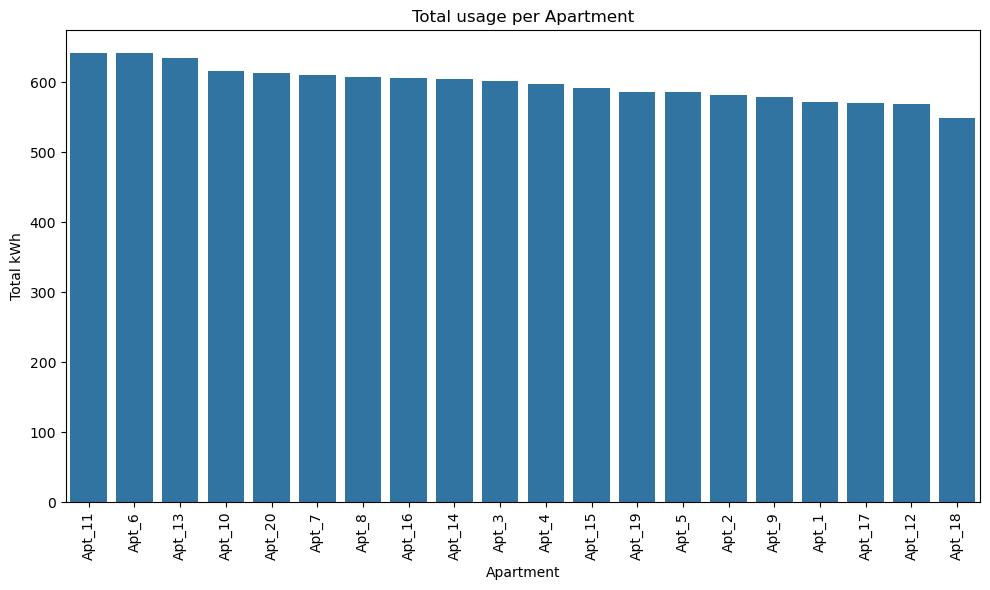

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_appartments.index, y=usage_per_appartments.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartment")
plt.xlabel("Apartment")
plt.ylabel("Total kWh")
plt.tight_layout()
plt.show()



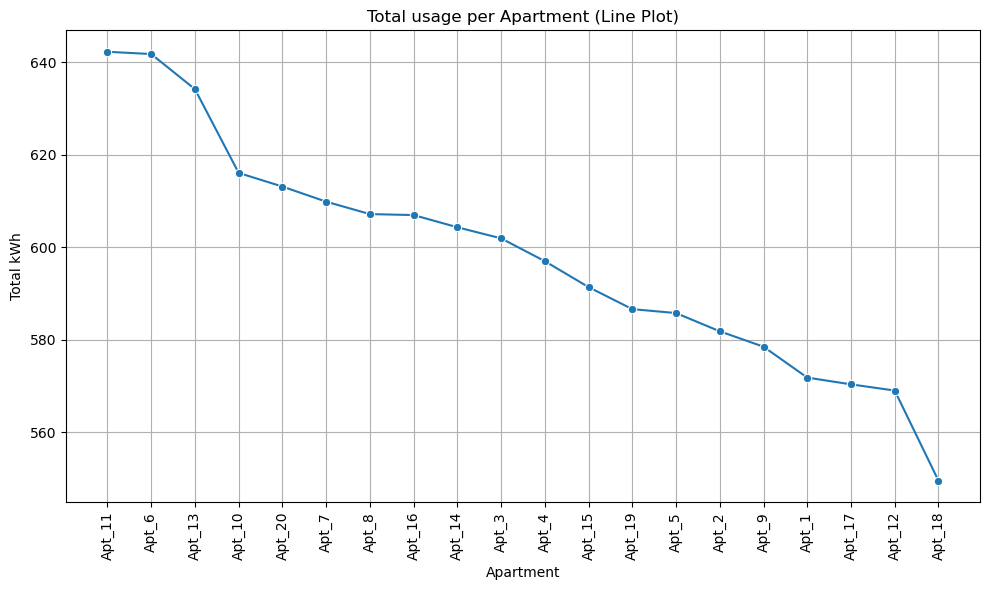

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x=usage_per_appartments.index, y=usage_per_appartments.values, marker='o')
plt.xticks(rotation=90)
plt.title("Total usage per Apartment (Line Plot)")
plt.xlabel("Apartment")
plt.ylabel("Total kWh")
plt.tight_layout()
plt.grid(True)
plt.show()


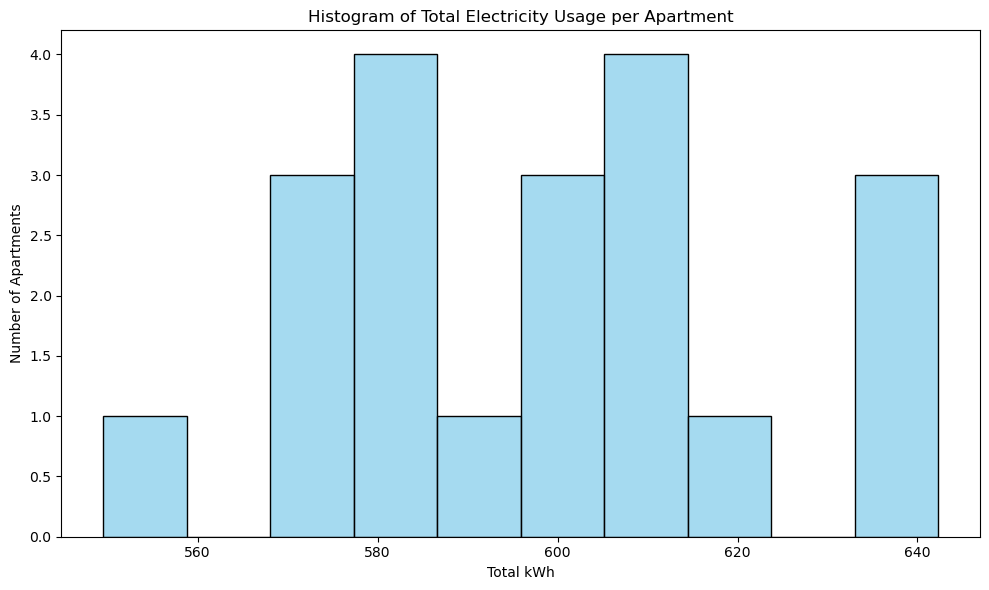

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(usage_per_appartments.values, bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Electricity Usage per Apartment")
plt.xlabel("Total kWh")
plt.ylabel("Number of Apartments")
plt.tight_layout()
plt.show()



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bkish\AppData\Local\Temp\ipykernel_11392\3022738498.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Apartment_num'] = df['Apartment'].str.extract('(\d+)').astype(int)


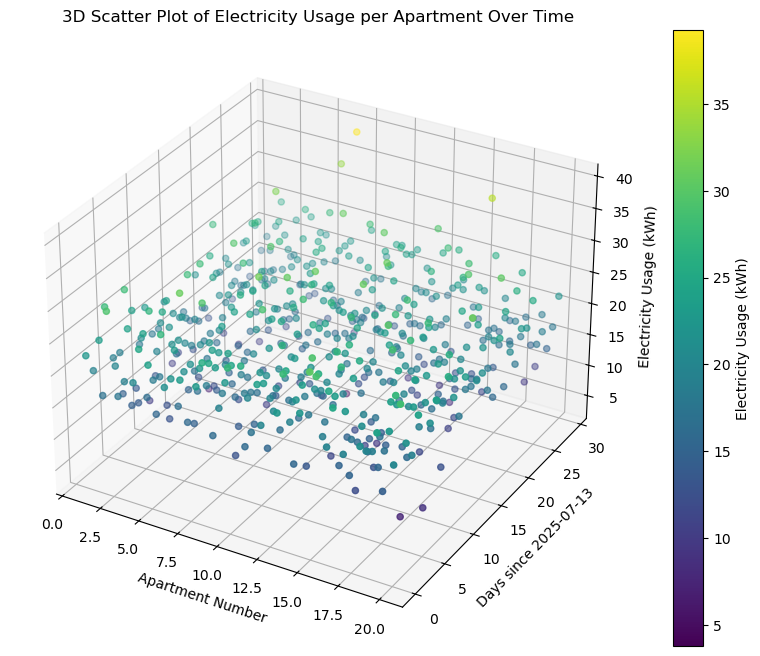

In [26]:
df['Apartment_num'] = df['Apartment'].str.extract('(\d+)').astype(int)
df['Date_num'] = (df['Date'] - df['Date'].min()).dt.days

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Apartment_num']
ys = df['Date_num']
zs = df['Electricity_usage']

scatter = ax.scatter(xs, ys, zs, c=zs, cmap='viridis')

ax.set_xlabel('Apartment Number')
ax.set_ylabel('Days since 2025-07-13')
ax.set_zlabel('Electricity Usage (kWh)')
ax.set_title('3D Scatter Plot of Electricity Usage per Apartment Over Time')

fig.colorbar(scatter, ax=ax, label='Electricity Usage (kWh)')
plt.show()



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bkish\AppData\Local\Temp\ipykernel_11392\702480408.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Apartment_num'] = df['Apartment'].str.extract('(\d+)').astype(int)


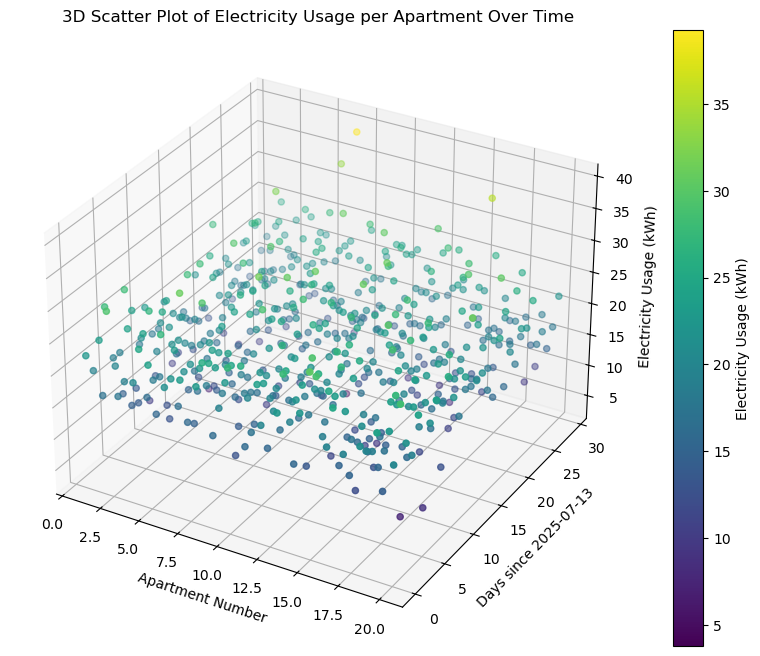

In [27]:
df['Apartment_num'] = df['Apartment'].str.extract('(\d+)').astype(int)
df['Date_num'] = (df['Date'] - df['Date'].min()).dt.days

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Apartment_num']
ys = df['Date_num']
zs = df['Electricity_usage']

scatter = ax.scatter(xs, ys, zs, c=zs, cmap='viridis')

ax.set_xlabel('Apartment Number')
ax.set_ylabel('Days since 2025-07-13')
ax.set_zlabel('Electricity Usage (kWh)')
ax.set_title('3D Scatter Plot of Electricity Usage per Apartment Over Time')

fig.colorbar(scatter, ax=ax, label='Electricity Usage (kWh)')

# 🔽 Save the figure BEFORE plt.show()
plt.savefig("3d_scatter_plot.png")  # Save as PNG image
plt.show()
